In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
u_train = np.load('u_train.npy')
output_train = np.load('output_train.npy')
u_test = np.load('u_test.npy')

In [4]:
print(output_train)

[-0.02047077  0.04789433 -0.05194387 ...  6.25651479  6.01250205
  5.30327333]


In [5]:
output_train.shape

(2040,)

In [6]:
np.unique(u_train)

array([-5.,  5.])

In [7]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 1000/1000 [00:19<00:00, 51.77it/s]


Best n, m, d: 9, 9, 5
Best Sum of Squared Errors (SSE) on the last 40 samples: 0.5751


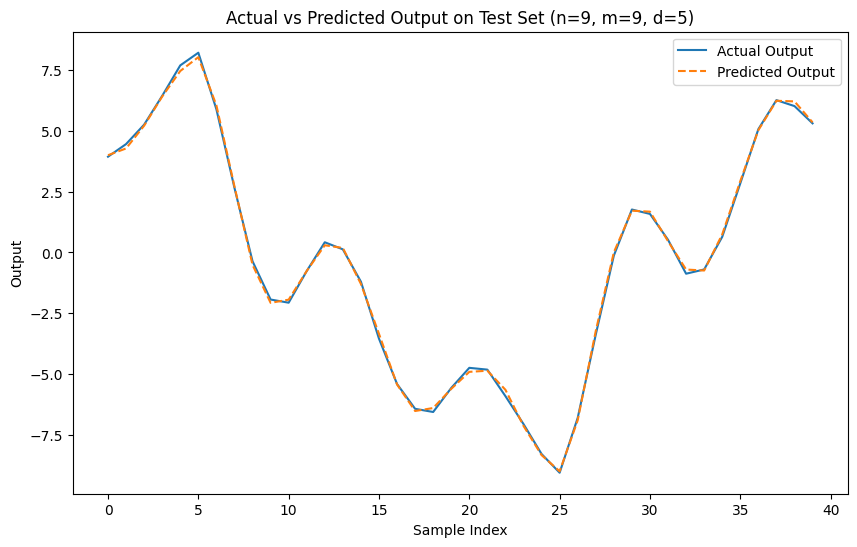

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm  # Import tqdm for progress tracking

N = 2040  # Total number of samples
u = u_train  # Input sequence (replace with real data)
y = output_train  # Output sequence (replace with real data)

from sklearn.preprocessing import StandardScaler

# Standardizing the input and output data
scaler_u = StandardScaler()
scaler_y = StandardScaler()

u_scaled = scaler_u.fit_transform(u.reshape(-1, 1)).flatten()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Use these scaled values for training and prediction.

# Create the regressor matrix X and output vector Y
def create_regression_matrix(y_scaled, u_scaled, n, m, d):
    N = len(y)
    p = max(n, m + d)
    X = []
    Y = []
    
    for k in range(p, N):
        # Autoregressive terms (y(k-1), ..., y(k-n))
        y_terms = [-y[k-i-1] for i in range(n)]
        # Exogenous terms (u(k-d), ..., u(k-d-m+1))
        u_terms = [u[k-d-i] for i in range(m)]
        X.append(y_terms + u_terms)
        Y.append(y[k])
        
    return np.array(X), np.array(Y)

# Split dataset
train_size = 2000
test_size = N - train_size

# Store best SSE and corresponding n, m, d values
best_sse = float('inf')
best_n, best_m, best_d = None, None, None
best_Y_pred = None

# Total number of iterations for the progress bar
total_iterations = 10 * 10 * 10  # For n, m, d from 1+0 to 9

# Initialize tqdm progress bar
with tqdm(total=total_iterations) as pbar:
    # Loop over all possible combinations of n, m, and d (all less than 10)
    for n in range(0, 10):
        for m in range(0, 10):
            for d in range(0, 10):
                # Create training data 
                X_train, Y_train = create_regression_matrix(y[:train_size], u[:train_size], n, m, d)

                # Create testing data
                X_test, Y_test = create_regression_matrix(y[train_size:], u[train_size:], n, m, d)

                # Train ARX model using least squares (solve for theta)
                theta = np.linalg.lstsq(X_train, Y_train, rcond=None)[0]

                # Predict on test set
                Y_pred = X_test @ theta

                # Compute the SSE (Sum of Squared Errors) on the last 400 samples
                sse = mean_squared_error(Y_test[-test_size:], Y_pred[-test_size:]) * len(Y_test[-test_size:])

                # Check if this combination gives a better result
                if sse < best_sse:
                    best_sse = sse
                    best_n, best_m, best_d = n, m, d
                    best_Y_pred = Y_pred

                # Update the progress bar
                pbar.update(1)

# Print the best combination and its SSE
print(f'Best n, m, d: {best_n}, {best_m}, {best_d}')
print(f'Best Sum of Squared Errors (SSE) on the last {test_size} samples: {best_sse:.4f}')

# Plot the results for the best combination
plt.figure(figsize=(10,6))
plt.plot(Y_test[-test_size:], label='Actual Output')
plt.plot(best_Y_pred[-test_size:], label='Predicted Output', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.title(f'Actual vs Predicted Output on Test Set (n={best_n}, m={best_m}, d={best_d})')
plt.legend()
plt.show()


[I 2024-10-09 10:56:34,641] A new study created in memory with name: no-name-ead8e9b3-211a-4da5-a9a5-81b8b85593b0
[I 2024-10-09 10:56:34,651] Trial 0 finished with value: 0.02962509325199225 and parameters: {'n': 1, 'm': 1, 'd': 4, 'alpha': 0.00043519494134912383}. Best is trial 0 with value: 0.02962509325199225.
[I 2024-10-09 10:56:34,665] Trial 1 finished with value: 0.03183899894531289 and parameters: {'n': 5, 'm': 1, 'd': 3, 'alpha': 0.021057163512607825}. Best is trial 0 with value: 0.02962509325199225.
[I 2024-10-09 10:56:34,685] Trial 2 finished with value: 0.013881204388195855 and parameters: {'n': 8, 'm': 9, 'd': 4, 'alpha': 0.0644766874794642}. Best is trial 2 with value: 0.013881204388195855.
[I 2024-10-09 10:56:34,725] Trial 3 finished with value: 0.0023543125850745733 and parameters: {'n': 8, 'm': 4, 'd': 6, 'alpha': 0.006218722172650012}. Best is trial 3 with value: 0.0023543125850745733.
[I 2024-10-09 10:56:34,765] Trial 4 finished with value: inf and parameters: {'n': 3

[I 2024-10-09 10:56:36,895] Trial 41 finished with value: 0.0004830625785413988 and parameters: {'n': 7, 'm': 9, 'd': 4, 'alpha': 0.0001448312240659433}. Best is trial 41 with value: 0.0004830625785413988.
[I 2024-10-09 10:56:36,949] Trial 42 finished with value: 0.00045139221944829044 and parameters: {'n': 7, 'm': 9, 'd': 5, 'alpha': 0.00019140886997836125}. Best is trial 42 with value: 0.00045139221944829044.
[I 2024-10-09 10:56:36,995] Trial 43 finished with value: 0.0005245005866937224 and parameters: {'n': 6, 'm': 9, 'd': 5, 'alpha': 0.00018466197834892873}. Best is trial 42 with value: 0.00045139221944829044.
[I 2024-10-09 10:56:37,051] Trial 44 finished with value: 0.000526300966939839 and parameters: {'n': 6, 'm': 9, 'd': 5, 'alpha': 0.00020310949330596062}. Best is trial 42 with value: 0.00045139221944829044.
[I 2024-10-09 10:56:37,105] Trial 45 finished with value: 0.0005795536888670551 and parameters: {'n': 6, 'm': 9, 'd': 5, 'alpha': 0.0005187308273643592}. Best is trial 42

[I 2024-10-09 10:56:39,280] Trial 81 finished with value: 0.00045394061718493836 and parameters: {'n': 8, 'm': 9, 'd': 5, 'alpha': 0.0001252297724514001}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:39,342] Trial 82 finished with value: 0.0004510471881419103 and parameters: {'n': 8, 'm': 9, 'd': 5, 'alpha': 0.00021151020954719217}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:39,401] Trial 83 finished with value: 0.0004650398069065221 and parameters: {'n': 8, 'm': 9, 'd': 5, 'alpha': 0.000495908189647809}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:39,466] Trial 84 finished with value: 0.0004468978923662937 and parameters: {'n': 9, 'm': 9, 'd': 5, 'alpha': 0.00020798649860208663}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:39,533] Trial 85 finished with value: 0.0004798198139268047 and parameters: {'n': 9, 'm': 9, 'd': 4, 'alpha': 0.00019769227960802113}. Best is trial 4

[I 2024-10-09 10:56:42,115] Trial 121 finished with value: 0.00042880794220696047 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0999077028369024e-05}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:42,188] Trial 122 finished with value: 0.0004413155228989699 and parameters: {'n': 9, 'm': 8, 'd': 6, 'alpha': 1.0476894822953782e-05}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:42,254] Trial 123 finished with value: 0.0004272042372974782 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.5388209358048983e-05}. Best is trial 48 with value: 0.00042119527080379933.
[I 2024-10-09 10:56:42,327] Trial 124 finished with value: 0.0004180157592873788 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 4.024536154816662e-05}. Best is trial 124 with value: 0.0004180157592873788.
[I 2024-10-09 10:56:42,402] Trial 125 finished with value: 0.00042368208903285253 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.432415893200963e-05}. Best is 

[I 2024-10-09 10:56:45,030] Trial 161 finished with value: 0.0004109598054349341 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 6.635804418043534e-05}. Best is trial 161 with value: 0.0004109598054349341.
[I 2024-10-09 10:56:45,092] Trial 162 finished with value: 0.0005711086892030986 and parameters: {'n': 9, 'm': 4, 'd': 6, 'alpha': 6.563286601098939e-05}. Best is trial 161 with value: 0.0004109598054349341.
[I 2024-10-09 10:56:45,163] Trial 163 finished with value: 0.00040874714370063374 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 9.163724770440819e-05}. Best is trial 163 with value: 0.00040874714370063374.
[I 2024-10-09 10:56:45,233] Trial 164 finished with value: 0.00040866939779084655 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 9.561338542217744e-05}. Best is trial 164 with value: 0.00040866939779084655.
[I 2024-10-09 10:56:45,310] Trial 165 finished with value: 0.000408783685259505 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 9.052002220474235e-05}. Best is tr

[I 2024-10-09 10:56:47,996] Trial 201 finished with value: 0.0004070902276172992 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00017302466735935772}. Best is trial 192 with value: 0.00040670198668426883.
[I 2024-10-09 10:56:48,093] Trial 202 finished with value: 0.0004071851747620961 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00017036236607728773}. Best is trial 192 with value: 0.00040670198668426883.
[I 2024-10-09 10:56:48,175] Trial 203 finished with value: 0.0004066677114318267 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00018548199083235186}. Best is trial 203 with value: 0.0004066677114318267.
[I 2024-10-09 10:56:48,242] Trial 204 finished with value: 0.00040709028678271214 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00017302300512288046}. Best is trial 203 with value: 0.0004066677114318267.
[I 2024-10-09 10:56:48,311] Trial 205 finished with value: 0.0005795612071609874 and parameters: {'n': 9, 'm': 5, 'd': 6, 'alpha': 0.0001733117162313494}. Best i

[I 2024-10-09 10:56:50,986] Trial 241 finished with value: 0.00040530397186876004 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00025409457692200166}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:51,072] Trial 242 finished with value: 0.00040527656095644936 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002636762326138192}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:51,142] Trial 243 finished with value: 0.00040531380676035224 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002506512639127138}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:51,200] Trial 244 finished with value: 0.00040791840873278775 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00038532080794970495}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:51,271] Trial 245 finished with value: inf and parameters: {'n': 4, 'm': 9, 'd': 6, 'alpha': 0.0002533600685953462}. Best is trial 234 with va

[I 2024-10-09 10:56:53,757] Trial 281 finished with value: 0.00040553205608844683 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00023324291186796575}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:53,830] Trial 282 finished with value: 0.0004167206656721965 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0005060698078027951}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:53,904] Trial 283 finished with value: inf and parameters: {'n': 9, 'm': 9, 'd': 8, 'alpha': 0.0003513838635379637}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:53,976] Trial 284 finished with value: 0.0004509772128974907 and parameters: {'n': 8, 'm': 8, 'd': 6, 'alpha': 0.00021885539488552023}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:54,054] Trial 285 finished with value: 0.00040533821363743526 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002959408623510941}. Best is trial 234 with valu

[I 2024-10-09 10:56:56,800] Trial 321 finished with value: 0.0004061428976528397 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00020403965998580037}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:56,862] Trial 322 finished with value: 0.0005183067301673294 and parameters: {'n': 9, 'm': 8, 'd': 6, 'alpha': 0.000863395074863567}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:56,927] Trial 323 finished with value: 0.00040528784020349613 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002614092658400381}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:57,008] Trial 324 finished with value: 0.0004062851983193343 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0001978395998971818}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:57,082] Trial 325 finished with value: 0.00041016092204612236 and parameters: {'n': 8, 'm': 9, 'd': 6, 'alpha': 0.0003646805640578553}. Best is tri

[I 2024-10-09 10:56:59,871] Trial 361 finished with value: 0.00040530648369370594 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00025304368400630976}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:56:59,937] Trial 362 finished with value: 0.0004429277142299169 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0007517224333059287}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:00,070] Trial 363 finished with value: 0.000406444994790158 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00019250072217074632}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:00,111] Trial 364 finished with value: 0.774548976939837 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.8037330496619286}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:00,199] Trial 365 finished with value: 0.00040541041974216906 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0003017524660616292}. Best is trial 234

[I 2024-10-09 10:57:02,937] Trial 401 finished with value: 0.00040561780461606414 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00031262561566373166}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:03,011] Trial 402 finished with value: 0.00041467486349164827 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0004839636987366307}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:03,077] Trial 403 finished with value: 0.0004054334937633139 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00023953793404472726}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:03,152] Trial 404 finished with value: 0.00040708769584961603 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00017309582626119023}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:03,225] Trial 405 finished with value: 0.0005256218934816065 and parameters: {'n': 6, 'm': 9, 'd': 6, 'alpha': 0.0003450063170257123}. Best is

[I 2024-10-09 10:57:05,941] Trial 441 finished with value: 0.004865965759865473 and parameters: {'n': 9, 'm': 9, 'd': 7, 'alpha': 0.00043238356188064986}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:06,031] Trial 442 finished with value: 0.0004052990377288908 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002905333068081449}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:06,121] Trial 443 finished with value: 0.00040695439928847707 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00017690403333374703}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:06,209] Trial 444 finished with value: 0.00040681783588187404 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0003587776690038952}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:06,296] Trial 445 finished with value: 0.0004057396537197995 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00022219784165639477}. Best is t

[I 2024-10-09 10:57:09,018] Trial 481 finished with value: 0.00040530522606992624 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00025354020398965667}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:09,071] Trial 482 finished with value: 0.774548976939837 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.4370509071599755}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:09,157] Trial 483 finished with value: 0.0004059005253825205 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00032759897644890466}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:09,250] Trial 484 finished with value: 0.004852551942482234 and parameters: {'n': 9, 'm': 9, 'd': 7, 'alpha': 0.00021498648750624554}. Best is trial 234 with value: 0.0004052512334829975.
[I 2024-10-09 10:57:09,330] Trial 485 finished with value: 0.0004115880681808227 and parameters: {'n': 8, 'm': 9, 'd': 6, 'alpha': 0.000403891279611133}. Best is trial 234 

[I 2024-10-09 10:57:11,126] Trial 22 finished with value: 0.004788731358960549 and parameters: {'n': 7, 'm': 7, 'd': 7, 'alpha': 0.021076731252685162}. Best is trial 13 with value: 0.0004102204409922196.
[I 2024-10-09 10:57:11,141] Trial 23 finished with value: 0.0004880745736217929 and parameters: {'n': 6, 'm': 8, 'd': 5, 'alpha': 0.0034934615142047957}. Best is trial 13 with value: 0.0004102204409922196.
[I 2024-10-09 10:57:11,158] Trial 24 finished with value: 0.00033362244740613596 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.111611794548724}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:11,181] Trial 25 finished with value: inf and parameters: {'n': 9, 'm': 9, 'd': 9, 'alpha': 0.2313095099248453}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:11,212] Trial 26 finished with value: 0.0046638921689198054 and parameters: {'n': 9, 'm': 9, 'd': 7, 'alpha': 0.1061700416851459}. Best is trial 24 with value: 0.000333622447406135

[I 2024-10-09 10:57:12,093] Trial 63 finished with value: 0.00035757433301923804 and parameters: {'n': 8, 'm': 9, 'd': 6, 'alpha': 0.1825384499597576}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:12,117] Trial 64 finished with value: 0.00039994950621614504 and parameters: {'n': 9, 'm': 8, 'd': 5, 'alpha': 0.18550654068546002}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:12,138] Trial 65 finished with value: 0.004693826623783736 and parameters: {'n': 8, 'm': 9, 'd': 7, 'alpha': 0.09699738767466103}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:12,162] Trial 66 finished with value: 0.00034354212641681073 and parameters: {'n': 9, 'm': 8, 'd': 6, 'alpha': 0.28148549728995115}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:12,187] Trial 67 finished with value: 0.0004033048460426855 and parameters: {'n': 9, 'm': 8, 'd': 5, 'alpha': 0.2658354665324229}. Best is trial 24 with value:

[I 2024-10-09 10:57:13,093] Trial 104 finished with value: 0.00039690517548619103 and parameters: {'n': 9, 'm': 9, 'd': 4, 'alpha': 0.004679788754410399}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:13,113] Trial 105 finished with value: inf and parameters: {'n': 2, 'm': 9, 'd': 5, 'alpha': 0.0018184493128537095}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:13,140] Trial 106 finished with value: 0.000334708494220266 and parameters: {'n': 9, 'm': 9, 'd': 5, 'alpha': 0.012241631871182103}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:13,166] Trial 107 finished with value: 0.00043677304820680525 and parameters: {'n': 8, 'm': 9, 'd': 4, 'alpha': 0.011579805887731064}. Best is trial 24 with value: 0.00033362244740613596.
[I 2024-10-09 10:57:13,187] Trial 108 finished with value: 0.0003345829509061413 and parameters: {'n': 9, 'm': 9, 'd': 5, 'alpha': 0.005508176438328405}. Best is trial 24 with value: 0.000

[I 2024-10-09 10:57:14,168] Trial 144 finished with value: 0.0003311827266644494 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.000289315123596516}. Best is trial 144 with value: 0.0003311827266644494.
[I 2024-10-09 10:57:14,197] Trial 145 finished with value: 0.0003311818675052167 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002290405142598558}. Best is trial 145 with value: 0.0003311818675052167.
[I 2024-10-09 10:57:14,217] Trial 146 finished with value: 0.00033118023852500344 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00011463544438379046}. Best is trial 146 with value: 0.00033118023852500344.
[I 2024-10-09 10:57:14,244] Trial 147 finished with value: 0.00033118017163943615 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.00010993453429447045}. Best is trial 147 with value: 0.00033118017163943615.
[I 2024-10-09 10:57:14,268] Trial 148 finished with value: 0.000331179980857967 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 9.652436035758965e-05}. Best is t

[I 2024-10-09 10:57:15,172] Trial 184 finished with value: 0.0003311787556611764 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.035122254812596e-05}. Best is trial 172 with value: 0.0003311787513741494.
[I 2024-10-09 10:57:15,204] Trial 185 finished with value: 0.00033117885200962686 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.7131141173787625e-05}. Best is trial 172 with value: 0.0003311787513741494.
[I 2024-10-09 10:57:15,235] Trial 186 finished with value: 0.00033117875302313344 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0165584990835665e-05}. Best is trial 172 with value: 0.0003311787513741494.
[I 2024-10-09 10:57:15,266] Trial 187 finished with value: 0.0046590403963618484 and parameters: {'n': 9, 'm': 9, 'd': 7, 'alpha': 1.0385135408201366e-05}. Best is trial 172 with value: 0.0003311787513741494.
[I 2024-10-09 10:57:15,297] Trial 188 finished with value: 0.00033117886186756577 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.7824802387719077e-05}. Best i

[I 2024-10-09 10:57:16,233] Trial 224 finished with value: 0.00033117875118320847 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0036100773360273e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:16,261] Trial 225 finished with value: 0.00048480435519772646 and parameters: {'n': 9, 'm': 6, 'd': 6, 'alpha': 1.1169763240136087e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:16,296] Trial 226 finished with value: 0.0003311787521492917 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0104087880193892e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:16,342] Trial 227 finished with value: 0.004659040387898102 and parameters: {'n': 9, 'm': 9, 'd': 7, 'alpha': 1.01947285044431e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:16,375] Trial 228 finished with value: 0.00033117898258532024 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.631868736946478e-05}. Best 

[I 2024-10-09 10:57:17,386] Trial 264 finished with value: 0.0003311788142323229 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.4472868444486706e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:17,410] Trial 265 finished with value: 0.00033117879880164306 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.3387035798496651e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:17,441] Trial 266 finished with value: 0.0003311787512415016 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0040209592004617e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:17,471] Trial 267 finished with value: 0.0005306367502790591 and parameters: {'n': 9, 'm': 3, 'd': 6, 'alpha': 2.032250062097934e-05}. Best is trial 215 with value: 0.00033117875088389646.
[I 2024-10-09 10:57:17,493] Trial 268 finished with value: 0.0005058805235683366 and parameters: {'n': 9, 'm': 5, 'd': 6, 'alpha': 1.3563796130186394e-05}. Best

[I 2024-10-09 10:57:18,545] Trial 304 finished with value: 0.00033117902926953235 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.9603214138291396e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:18,576] Trial 305 finished with value: 0.00036422657461413464 and parameters: {'n': 7, 'm': 9, 'd': 6, 'alpha': 1.662771435039844e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:18,610] Trial 306 finished with value: 0.00033117875122839433 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0039287033785639e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:18,644] Trial 307 finished with value: 0.00044147926159675136 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 9.756326968439582}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:18,673] Trial 308 finished with value: 0.00033117875179921057 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0079447416507988e-05}. Best is t

[I 2024-10-09 10:57:19,794] Trial 344 finished with value: 0.0003344856004731669 and parameters: {'n': 9, 'm': 9, 'd': 5, 'alpha': 1.3369925987022273e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:19,822] Trial 345 finished with value: 0.0003311789927813611 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.703604394334402e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:19,846] Trial 346 finished with value: 0.00033117884380142614 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.6553562249309382e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:19,872] Trial 347 finished with value: 0.00033117879563997806 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.3164551502737526e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:19,906] Trial 348 finished with value: 0.00033117875142534535 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.005314128323379e-05}. Best is

[I 2024-10-09 10:57:21,047] Trial 384 finished with value: 0.00033117879267363713 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.2955811940338845e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:21,071] Trial 385 finished with value: inf and parameters: {'n': 5, 'm': 9, 'd': 6, 'alpha': 1.0009384936917582e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:21,097] Trial 386 finished with value: 0.0003311788618563478 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.7824017487310747e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:21,123] Trial 387 finished with value: inf and parameters: {'n': 8, 'm': 9, 'd': 8, 'alpha': 1.2981301498944261e-05}. Best is trial 269 with value: 0.0003311787507804299.
[I 2024-10-09 10:57:21,157] Trial 388 finished with value: 0.00045986404381179787 and parameters: {'n': 6, 'm': 9, 'd': 5, 'alpha': 2.738909418131648e-05}. Best is trial 269 with value: 0.00033117875

[I 2024-10-09 10:57:22,345] Trial 424 finished with value: inf and parameters: {'n': 9, 'm': 9, 'd': 9, 'alpha': 1.0058817311795939e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:22,372] Trial 425 finished with value: 0.0003311789331379756 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.2839598816748343e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:22,407] Trial 426 finished with value: 0.00033117883849403484 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.6180097914891873e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:22,458] Trial 427 finished with value: 0.0003311787511305245 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0032395138937592e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:22,495] Trial 428 finished with value: 0.00033117879830961574 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.3352414956165776e-05}. Best is trial 396 wi

[I 2024-10-09 10:57:23,617] Trial 464 finished with value: 0.0005382063019397078 and parameters: {'n': 9, 'm': 2, 'd': 6, 'alpha': 1.6550032296602803e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:23,651] Trial 465 finished with value: 0.00033117879985761526 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.3461345883977262e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:23,690] Trial 466 finished with value: 0.0003311789085468921 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.110933465101181e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:23,725] Trial 467 finished with value: 0.0003311790288961371 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 2.957694260175057e-05}. Best is trial 396 with value: 0.00033117875068266767.
[I 2024-10-09 10:57:23,758] Trial 468 finished with value: 0.0003311787912365387 and parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.2854684775486465e-05}. Best 

[I 2024-10-09 10:57:24,836] Trial 4 finished with value: inf and parameters: {'n': 3, 'm': 2, 'd': 2}. Best is trial 1 with value: 0.0005786098619032273.
[I 2024-10-09 10:57:24,847] Trial 5 finished with value: 0.0005817617283154302 and parameters: {'n': 7, 'm': 6, 'd': 2}. Best is trial 1 with value: 0.0005786098619032273.
[I 2024-10-09 10:57:24,859] Trial 6 finished with value: inf and parameters: {'n': 7, 'm': 8, 'd': 8}. Best is trial 1 with value: 0.0005786098619032273.
[I 2024-10-09 10:57:24,864] Trial 7 finished with value: inf and parameters: {'n': 2, 'm': 1, 'd': 4}. Best is trial 1 with value: 0.0005786098619032273.
[I 2024-10-09 10:57:24,871] Trial 8 finished with value: 0.016284599046185556 and parameters: {'n': 1, 'm': 5, 'd': 7}. Best is trial 1 with value: 0.0005786098619032273.
[I 2024-10-09 10:57:24,876] Trial 9 finished with value: inf and parameters: {'n': 3, 'm': 1, 'd': 4}. Best is trial 1 with value: 0.0005786098619032273.
[I 2024-10-09 10:57:24,897] Trial 10 fini

[I 2024-10-09 10:57:25,945] Trial 53 finished with value: 0.00033474855736556825 and parameters: {'n': 9, 'm': 8, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:25,971] Trial 54 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:25,989] Trial 55 finished with value: 0.004699334666393934 and parameters: {'n': 8, 'm': 9, 'd': 7}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:26,010] Trial 56 finished with value: 0.0004848046214464227 and parameters: {'n': 9, 'm': 6, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:26,032] Trial 57 finished with value: 0.0004371474173283447 and parameters: {'n': 8, 'm': 8, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:26,053] Trial 58 finished with value: 0.004659039934732571 and parameters: {'n': 9, 'm': 9, 'd': 7}. Best is t

[I 2024-10-09 10:57:27,057] Trial 101 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:27,077] Trial 102 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:27,098] Trial 103 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:27,125] Trial 104 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:27,148] Trial 105 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:27,173] Trial 106 finished with value: 0.0048895807017856376 and parameters: {'n': 9, 'm': 2, 'd': 7}. Be

[I 2024-10-09 10:57:28,197] Trial 149 finished with value: 0.00033474855736556825 and parameters: {'n': 9, 'm': 8, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:28,221] Trial 150 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:28,241] Trial 151 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:28,261] Trial 152 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:28,288] Trial 153 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:28,314] Trial 154 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. B

[I 2024-10-09 10:57:29,425] Trial 196 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:29,448] Trial 197 finished with value: inf and parameters: {'n': 3, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:29,477] Trial 198 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:29,502] Trial 199 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:29,522] Trial 200 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:29,542] Trial 201 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 wit

[I 2024-10-09 10:57:30,663] Trial 244 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:30,685] Trial 245 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:30,716] Trial 246 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:30,736] Trial 247 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:30,763] Trial 248 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:30,789] Trial 249 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Be

[I 2024-10-09 10:57:31,861] Trial 292 finished with value: 0.000396923054834435 and parameters: {'n': 9, 'm': 8, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:31,884] Trial 293 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:31,921] Trial 294 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:31,951] Trial 295 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:31,984] Trial 296 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:32,004] Trial 297 finished with value: 0.004699334666393934 and parameters: {'n': 8, 'm': 9, 'd': 7}. Best

[I 2024-10-09 10:57:33,179] Trial 340 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:33,204] Trial 341 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:33,239] Trial 342 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:33,271] Trial 343 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:33,303] Trial 344 finished with value: inf and parameters: {'n': 5, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:33,339] Trial 345 finished with value: 0.0003642268232217033 and parameters: {'n': 7, 'm': 9, 'd': 6}. Best is trial 15 wit

[I 2024-10-09 10:57:34,614] Trial 388 finished with value: 0.0003969457129959143 and parameters: {'n': 9, 'm': 9, 'd': 4}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:34,650] Trial 389 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:34,683] Trial 390 finished with value: 0.0004111348781234906 and parameters: {'n': 8, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:34,711] Trial 391 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:34,744] Trial 392 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:34,772] Trial 393 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Be

[I 2024-10-09 10:57:36,007] Trial 436 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:36,046] Trial 437 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:36,085] Trial 438 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:36,126] Trial 439 finished with value: 0.0004337209256394123 and parameters: {'n': 6, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:36,154] Trial 440 finished with value: inf and parameters: {'n': 9, 'm': 9, 'd': 9}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:36,187] Trial 441 finished with value: 0.00033474855736556825 and parameters: {'n': 9, 'm': 8, 'd': 6}. Best is trial 15 wi

[I 2024-10-09 10:57:37,521] Trial 484 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:37,556] Trial 485 finished with value: 0.0003344853693017387 and parameters: {'n': 9, 'm': 9, 'd': 5}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:37,594] Trial 486 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:37,623] Trial 487 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:37,660] Trial 488 finished with value: 0.0003311786085769562 and parameters: {'n': 9, 'm': 9, 'd': 6}. Best is trial 15 with value: 0.0003311786085769562.
[I 2024-10-09 10:57:37,699] Trial 489 finished with value: 0.004659039934732571 and parameters: {'n': 9, 'm': 9, 'd': 7}. Bes

Best Lasso parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 0.0002750281103830187}, SSE: 0.0004052512334829975
Best Ridge parameters: {'n': 9, 'm': 9, 'd': 6, 'alpha': 1.0000881025439265e-05}, SSE: 0.00033117875068266767
Best Linear Regression parameters: {'n': 9, 'm': 9, 'd': 6}, SSE: 0.0003311786085769562

Best overall model: Linear
Best parameters: {'n': 9, 'm': 9, 'd': 6}
Is the model stable? Yes
Final predictions saved to 'final_preds2.npy'
Mean Squared Error for last 50 training examples: 0.018315161249066958


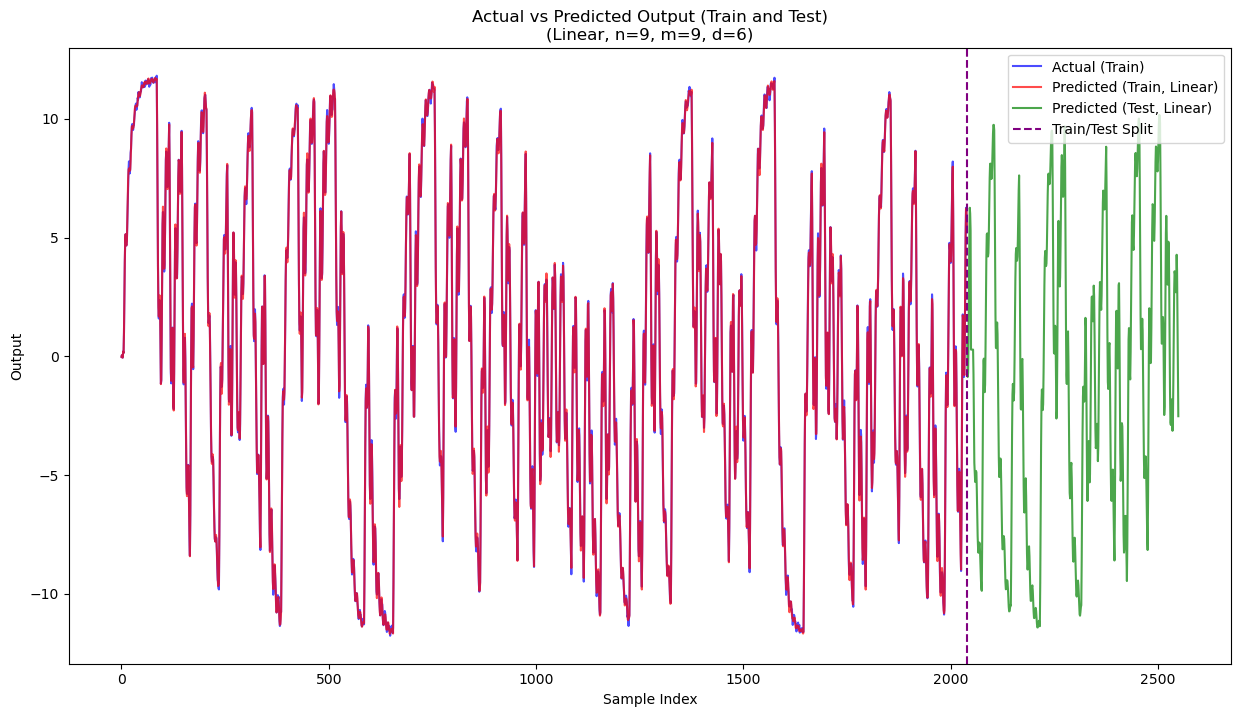

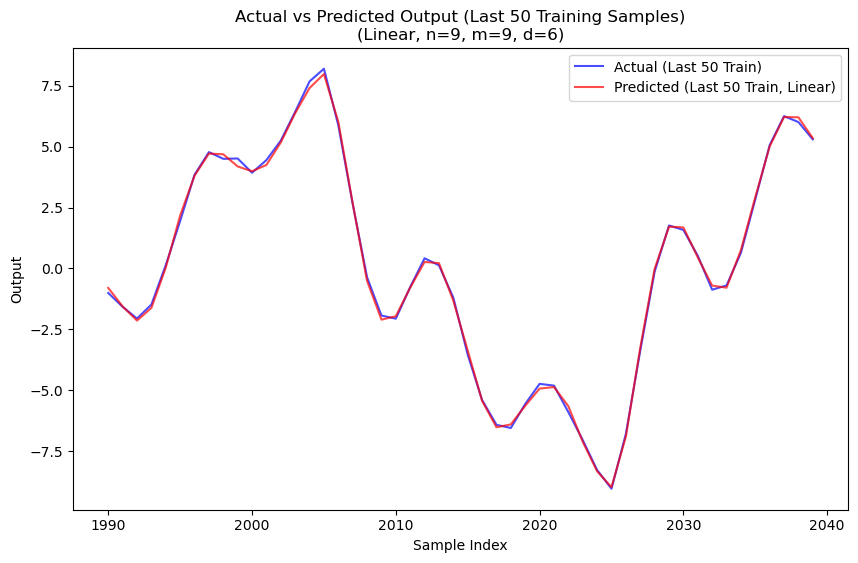

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from tqdm import tqdm
import warnings
import optuna

warnings.filterwarnings("ignore")

# Assuming u_train, output_train, and u_test are provided correctly as input sequences
N = 2040  # Total number of samples
u = u_train  # Input sequence (replace with real data)
y = output_train  # Output sequence (replace with real data)

# Standardizing the input and output data
scaler_u = StandardScaler()
scaler_y = StandardScaler()

u_scaled = scaler_u.fit_transform(u.reshape(-1, 1)).flatten()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Scale u_test using the same scaler as u_train
u_test_scaled = scaler_u.transform(u_test.reshape(-1, 1)).flatten()

def create_regression_matrix(y_scaled, u_scaled, n, m, d):
    N = len(y_scaled)
    p = max(n, m + d)
    X = []
    Y = []
    
    for k in range(p, N):
        y_terms = [-y_scaled[k-i-1] for i in range(n)]
        u_terms = [u_scaled[k-d-i] for i in range(m)]
        X.append(y_terms + u_terms)
        Y.append(y_scaled[k])
        
    return np.array(X), np.array(Y)

def is_stable(theta_ar):
    char_poly = np.concatenate(([1], -theta_ar))
    roots = np.roots(char_poly)
    return np.all(np.abs(roots) < 1)

def check_model_stability(model, n):
    ar_coeffs = model.coef_[:n]
    return is_stable(ar_coeffs)

def one_step_ahead_prediction(y, u, theta, n, m, d):
    predictions = []
    for k in range(len(y)):
        if k < max(n, m + d):
            predictions.append(y[k])
        else:
            x = np.concatenate(([-y[k-i-1] for i in range(n)], 
                                [u[k-d-i] for i in range(m)]))
            predictions.append(np.dot(x, theta))
    return np.array(predictions)

train_size = 1800
test_size = N - train_size

# Optuna objective functions for each model
def objective_lasso(trial):
    n = trial.suggest_int('n', 1, 9)
    m = trial.suggest_int('m', 1, 9)
    d = trial.suggest_int('d', 1, 9)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
    
    X_train, Y_train = create_regression_matrix(y_scaled[:train_size], u_scaled[:train_size], n, m, d)
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, Y_train)
    
    if not check_model_stability(lasso, n):
        return float('inf')  # Return a large value for unstable models
    
    Y_pred_test = one_step_ahead_prediction(y_scaled[train_size:], u_scaled[train_size:], lasso.coef_, n, m, d)
    
    return mean_squared_error(y_scaled[train_size:], Y_pred_test)

def objective_ridge(trial):
    n = trial.suggest_int('n', 1, 9)
    m = trial.suggest_int('m', 1, 9)
    d = trial.suggest_int('d', 0, 9)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
    
    X_train, Y_train = create_regression_matrix(y_scaled[:train_size], u_scaled[:train_size], n, m, d)
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, Y_train)
    
    if not check_model_stability(ridge, n):
        return float('inf')  # Return a large value for unstable models
    
    Y_pred_test = one_step_ahead_prediction(y_scaled[train_size:], u_scaled[train_size:], ridge.coef_, n, m, d)
    
    return mean_squared_error(y_scaled[train_size:], Y_pred_test)

def objective_linear(trial):
    n = trial.suggest_int('n', 1, 9)
    m = trial.suggest_int('m', 1, 9)
    d = trial.suggest_int('d', 0, 9)
    
    X_train, Y_train = create_regression_matrix(y_scaled[:train_size], u_scaled[:train_size], n, m, d)
    
    linear = LinearRegression()
    linear.fit(X_train, Y_train)
    
    if not check_model_stability(linear, n):
        return float('inf')  # Return a large value for unstable models
    
    Y_pred_test = one_step_ahead_prediction(y_scaled[train_size:], u_scaled[train_size:], linear.coef_, n, m, d)
    
    return mean_squared_error(y_scaled[train_size:], Y_pred_test)

# Optimize each model using Optuna
study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=500)

study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=500)

study_linear = optuna.create_study(direction='minimize')
study_linear.optimize(objective_linear, n_trials=500)

# Get best parameters and SSE for each model
best_lasso_params = study_lasso.best_params
best_lasso_sse = study_lasso.best_value

best_ridge_params = study_ridge.best_params
best_ridge_sse = study_ridge.best_value

best_linear_params = study_linear.best_params
best_linear_sse = study_linear.best_value

# Display results for all models
print(f'Best Lasso parameters: {best_lasso_params}, SSE: {best_lasso_sse}')
print(f'Best Ridge parameters: {best_ridge_params}, SSE: {best_ridge_sse}')
print(f'Best Linear Regression parameters: {best_linear_params}, SSE: {best_linear_sse}')

# Determine the best overall model
best_model = min(
    ("Lasso", best_lasso_sse, best_lasso_params),
    ("Ridge", best_ridge_sse, best_ridge_params),
    ("Linear", best_linear_sse, best_linear_params),
    key=lambda x: x[1]
)

print(f"\nBest overall model: {best_model[0]}")
print(f"Best parameters: {best_model[2]}")

# Train the best model
X_train_best, Y_train_best = create_regression_matrix(y_scaled, u_scaled, 
                                                      best_model[2]['n'], best_model[2]['m'], best_model[2]['d'])

if best_model[0] == "Lasso":
    best_model_fit = Lasso(alpha=best_model[2]['alpha'])
elif best_model[0] == "Ridge":
    best_model_fit = Ridge(alpha=best_model[2]['alpha'])
else:
    best_model_fit = LinearRegression()

best_model_fit.fit(X_train_best, Y_train_best)

# Extract best parameters
n, m, d = best_model[2]['n'], best_model[2]['m'], best_model[2]['d']

# Check model stability
is_model_stable = check_model_stability(best_model_fit, n)
print(f"Is the model stable? {'Yes' if is_model_stable else 'No'}")

# If the model is not stable, you might want to consider re-running the optimization
# with constraints on the AR coefficients or using a different model structure
if not is_model_stable:
    print("Warning: The model is not stable. Consider re-running the optimization with constraints or using a different model structure.")

# Predict for the entire train dataset
y_pred_train = one_step_ahead_prediction(y_scaled, u_scaled, best_model_fit.coef_, n, m, d)
y_pred_train_original = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()

# Predict for u_test
y_pred_u_test = []
y_init = y_scaled[-n:]

for i in range(len(u_test_scaled)):
    if i < max(n, m + d):
        y_pred_u_test.append(y_init[i] if i < n else 0)
    else:
        x = np.concatenate(([-y_pred_u_test[i-j-1] for j in range(n)], 
                            [u_test_scaled[i-d-j] for j in range(m)]))
        y_pred_u_test.append(np.dot(x, best_model_fit.coef_))

y_pred_u_test = np.array(y_pred_u_test)
y_pred_u_test_original = scaler_y.inverse_transform(y_pred_u_test.reshape(-1, 1)).flatten()

# Get only the last 400 values of u_test predictions
final_predictions = y_pred_u_test_original[-400:]

# Save the last 400 predictions to a .npy file
np.save('/Users/marianahenriques/Documents/final_preds2.npy', final_predictions)
print("Final predictions saved to 'final_preds2.npy'")

# Get the last 50 examples of the training set
last_50_train = y[-50:]
last_50_pred_train = y_pred_train_original[-50:]

# Calculate the mean squared error for the last 50 examples
mse_last_50 = mean_squared_error(last_50_train, last_50_pred_train)
print(f"Mean Squared Error for last 50 training examples: {mse_last_50}")

# Plotting the results
plt.figure(figsize=(15,8))

# Plot train data
plt.plot(range(len(y)), y, label='Actual (Train)', color='blue', alpha=0.7)
plt.plot(range(len(y_pred_train_original)), y_pred_train_original, label=f'Predicted (Train, {best_model[0]})', color='red', alpha=0.7)

# Plot test data
plt.plot(range(len(y), len(y) + len(y_pred_u_test_original)), y_pred_u_test_original, label=f'Predicted (Test, {best_model[0]})', color='green', alpha=0.7)

plt.axvline(x=len(y), color='purple', linestyle='--', label='Train/Test Split')

plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.title(f'Actual vs Predicted Output (Train and Test)\n({best_model[0]}, n={n}, m={m}, d={d})')
plt.legend()
plt.show()

# Plot the last 50 examples of the training set
plt.figure(figsize=(10,6))
plt.plot(range(len(y)-50, len(y)), last_50_train, label='Actual (Last 50 Train)', color='blue', alpha=0.7)
plt.plot(range(len(y)-50, len(y)), last_50_pred_train, label=f'Predicted (Last 50 Train, {best_model[0]})', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.title(f'Actual vs Predicted Output (Last 50 Training Samples)\n({best_model[0]}, n={n}, m={m}, d={d})')
plt.legend()
plt.show()
